In [19]:
%pylab inline

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.collections import PatchCollection

from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display

import numba as nb
import time

Populating the interactive namespace from numpy and matplotlib


In [20]:
G = 6.67e-8

dt = 1e-1
stepN = 100

In [21]:
# xyDistribution = [
#                  [1000.0, 1000.0],
#                  [-1000.0, -1000.0],
#                  [-1000.0, 1000.0]
#                  ]

#xyDistribution=np.array(xyDistribution)
#print(xyDistribution.shape)
nParticles = 50
xyDistribution = np.random.normal(0, 5e7, size = (nParticles, 2))
velocityDistribution = np.zeros_like(xyDistribution, dtype = np.float)


#mDistribution = [3e14, 3e14, 3e14]
mDistribution = np.ones(nParticles, dtype=float) * 2e27

ParticlePositionHistory = np.zeros((stepN,nParticles,2))

timeArray = np.zeros(stepN)
for i in range(stepN):
    timeArray[i] = i*dt

[]

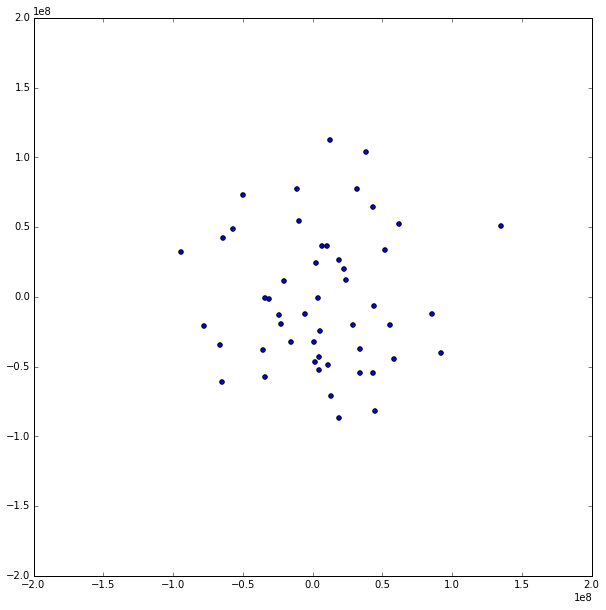

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(xyDistribution[:,0], xyDistribution[:,1], c='b')
plt.xlim(-2e8, 2e8)
plt.ylim(-2e8, 2e8)
plt.plot()

In [23]:
# def gravityvelocity(dt, stepN):
    
#     global velocityDistribution
#     global xyDistribution
    
#     deltaV = np.zeros_like(xyDistribution, dtype = np.float)
#     #t = 0
#     for i in range(stepN):
#         #t+=dt
#         #print(i)
#         for j in range(0, len(mDistribution)):
#             for k in range(0, len(mDistribution)):
#                 if (k!=j):
#                     xdist = (xyDistribution[j,0]-xyDistribution[k,0])
#                     ydist = (xyDistribution[j,1]-xyDistribution[k,1])
#                     #print(xdist)
#                     #print(ydist)

#                     if(xdist==0):
#                         deltaV[j,0] += 0
#                     elif(xdist!=0):
#                         deltaV[j,0] += -G*mDistribution[j]*xdist/((np.sqrt(xdist**2+ydist**2))**3)
#                         #print("blah", -G*mDistribution[i]/(np.sqrt(abs(position[j,0]-position[i,0]))**2))
#                         #print("v", i, "x", velocityDistribution[i,0])

#                     if(ydist==0):
#                         deltaV[j,1] += 0
#                     elif(ydist!=0):
#                         deltaV[j,1] += -G*mDistribution[j]*ydist/((np.sqrt(xdist**2+ydist**2))**3)
#                         #print("v", i, "y", velocityDistribution[i,1])
        
#         velocityDistribution += dt*deltaV
#         #print("2nd", i)
#         xyDistribution += dt*velocityDistribution
#         ParticlePositionHistory[i,:,:] = xyDistribution
#         #print(i, ParticlePositionHistory)
#     print(np.sqrt(xdist**2+ydist**2))

In [24]:
def gravity():
    
    global velocityDistribution
    global xyDistribution
    
    deltaV = np.zeros_like(xyDistribution, dtype = np.float)
    for j in range(0, nParticles):
        for k in range(0, nParticles):
            if (k!=j):
                xdist = (xyDistribution[j,0]-xyDistribution[k,0])
                ydist = (xyDistribution[j,1]-xyDistribution[k,1])
                #print(xdist)
                #print(ydist)

                if(xdist==0):
                    deltaV[j,0] += 0
                elif(xdist!=0):
                    deltaV[j,0] += -G*mDistribution[j]*xdist/((np.sqrt(xdist**2+ydist**2))**3)
                    #print("blah", -G*mDistribution[i]/(np.sqrt(abs(position[j,0]-position[i,0]))**2))
                    #print("v", i, "x", velocityDistribution[i,0])

                if(ydist==0):
                    deltaV[j,1] += 0
                elif(ydist!=0):
                    deltaV[j,1] += -G*mDistribution[j]*ydist/((np.sqrt(xdist**2+ydist**2))**3)
                    #print("v", i, "y", velocityDistribution[i,1])
    return deltaV

nb_gravity = nb.autojit(gravity)

# print nb_gravity()
# print gradP()

In [25]:
t = 0
dt = 1e-1
stepN = 10

# Particle history
ParticlePositionHistory = np.zeros((nParticles,2,stepN))
ParticleVelocityHistory = np.zeros((nParticles,2,stepN))

for i in range(stepN):
    t += 1
    ParticlePositionHistory[:,:,i] = xyDistribution
    deltaV = nb_gravity() * dt
#    deltaV = -gradP()/rhoDistribution[:,np.newaxis] * dt
    velocityDistribution += deltaV
    deltaPos = velocityDistribution * dt
    xyDistribution += deltaPos

In [26]:
# xyDistributionOld = np.copy(xyDistribution) 


# # numbaRK = nb.autojit(RK1)
# # numbaGrav = nb.autojit(gravity)
# t0 = time.time()
# # velocityDistribution = RK1(gravity, dt, xyDistribution, velocityDistribution, stepN)
# # xyDistribution = RK1()
# gravityvelocity(dt,stepN)
# #position(dt,stepN)
# t1 = time.time()
# print(t1-t0)
# #print (xyDistribution)

[]

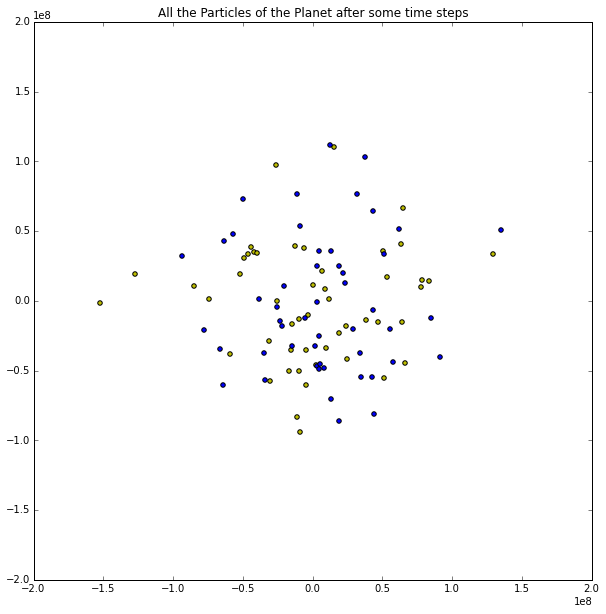

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(xyDistributionOld[:,0], xyDistributionOld[:,1], c='y')
plt.scatter(xyDistribution[:,0], xyDistribution[:,1], c='b')
plt.title("All the Particles of the Planet after some time steps")
plt.xlim(-2e8, 2e8)
plt.ylim(-2e8, 2e8)
plt.plot()

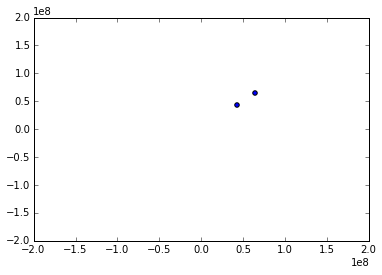

In [28]:
slider = FloatSlider(description='Time', min=0, max=stepN, step=1)

def update_plot():
    time=slider.value
    x = ParticlePositionHistory[time-1,:,0]
    y = ParticlePositionHistory[time-1,:,1]
    fig = plt.figure()
    plt.scatter(x, y)
    plt.xlim(-2e8,2e8)
    plt.ylim(-2e8,2e8)

    clear_output(True)

slider.on_trait_change(update_plot, 'value')


display(slider)
update_plot()